In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [1]:
import pickle

In [2]:
# Load the model from the file
with open('saved_random_forest_model_new5000.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [3]:
loaded_model

RandomForestClassifier()

In [41]:
# # Directory path where the CSV files are located
# directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# # List to store the individual DataFrames
# dfs = []

# # Get the list of file names in alphabetical order
# file_names = sorted(os.listdir(directory))

# # Iterate over the files in the directory
# for filename in file_names:
#     if filename.endswith('.csv'):
#         file_path = os.path.join(directory, filename)
        #print(file_path)
df = pd.read_csv(r"C:\Users\raulo\Desktop\L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)
df = df.drop(0)
df.index = df.index -1    #Set the index rigth
df = df.drop(columns='bodyparts')

C:\Users\raulo\AppData\Local\Temp\ipykernel_7624\2542790376.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\raulo\Desktop\L3_GH060001_re-encodeDLC_dlcrnetms5_Daniele_Ocean_Int_Encoded_Trial_1Nov14shuffle1_50000_el_filtered.csv", header = 2)


In [48]:
# # Directory path where the CSV files are located
# directory = r'D:\Tese\Videos DLC\Labels\Ocean_Int\DATA'

# # List to store the individual DataFrames
# dfs_labels = []

# # Get the list of file names in alphabetical order
# file_names = sorted(os.listdir(directory))

# # Iterate over the files in the directory
# for filename in file_names:
#     if filename.endswith('.csv'):
#file_path = os.path.join(r"C:\Users\raulo\Desktop\L3_GH060001_re-encode.csv", filename)
df_label = pd.read_csv(r"C:\Users\raulo\Desktop\L3_GH060001_re-encode.csv")
df_label = df_label.drop(columns='Unnamed: 0')
#print(file_path)

In [49]:
df_label

,background,Int_Cleaner,Int_Client,Dance,TS,Pousing,Jolt,Run
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
31855,1,0,0,0,0,0,0,0
31856,1,0,0,0,0,0,0,0
31857,1,0,0,0,0,0,0,0
31858,1,0,0,0,0,0,0,0


In [54]:
# Convert DataFrame into a single-column DataFrame
single_column_df = pd.DataFrame(df_label.idxmax(axis=1), columns=['Interaction'])

In [57]:
single_column_df["Interaction"] = single_column_df["Interaction"].replace("Pousing", "background")

interaction_counts2 = single_column_df["Interaction"].value_counts()
print(interaction_counts2)

background     31558
Int_Cleaner      218
Int_Client        84
Name: Interaction, dtype: int64


In [62]:
labeled_df = pd.concat([single_column_df, df], axis=1)

In [64]:
merged_df = labeled_df

In [66]:
merged_df

,Interaction,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,background,1131.812,388.689,0.9449999928474426,1173.098,411.117,0.9810000061988831,1203.6,432.953,0.9990000128746033,...,1.0,837.341,587.519,0.9990000128746033,812.389,605.305,0.9980000257492065,833.135,634.616,1.0
1,background,1131.895,388.689,0.8989999890327454,1173.159,411.117,0.9769999980926514,1204.166,433.459,0.9990000128746033,...,1.0,843.705,588.602,0.9950000047683716,812.84,605.305,0.9950000047683716,833.135,634.996,1.0
2,background,1132.019,388.689,0.9340000152587891,1173.467,411.117,0.9940000176429749,1204.166,433.87,0.9990000128746033,...,1.0,849.566,588.641,0.9990000128746033,818.574,605.305,0.9850000143051147,833.135,634.996,0.9990000128746033
3,background,1132.028,388.61,0.906000018119812,1173.159,410.602,0.9929999709129333,1203.6,433.87,0.9990000128746033,...,1.0,851.183,588.641,0.9990000128746033,818.574,605.198,0.9919999837875366,833.025,634.795,1.0
4,background,1132.047,388.586,0.878000020980835,1173.159,410.573,0.9959999918937683,1203.505,434.654,0.9990000128746033,...,1.0,859.88,588.684,0.9900000095367432,819.663,604.241,0.9909999966621399,827.711,634.616,0.9990000128746033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31855,background,1196.039,427.281,0.992,1206.096,412.605,0.999,1237.85,403.489,0.998,...,1.0,1031.244,611.984,1.0,994.533,588.005,0.999,1004.522,549.694,0.999
31856,background,1196.039,427.203,0.992,1205.875,412.605,0.999,1237.554,403.36,0.998,...,1.0,1031.401,613.643,1.0,988.119,588.15,0.997,1003.413,555.656,0.999
31857,background,1196.039,426.947,0.97,1205.809,412.657,0.999,1237.511,403.19,0.999,...,1.0,1036.391,619.361,0.998,987.535,588.22,0.998,1003.338,555.837,0.998
31858,background,1196.022,426.876,0.964,1205.377,412.19,0.999,1237.404,403.1,0.999,...,1.0,1036.391,619.361,0.998,987.488,588.22,0.999,1003.331,555.837,0.994


In [65]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [68]:
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

In [69]:
# Load necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score

# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = loaded_model.predict(X_imputed)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9817953546767106


In [70]:
cm = confusion_matrix(y_true, y_pred)

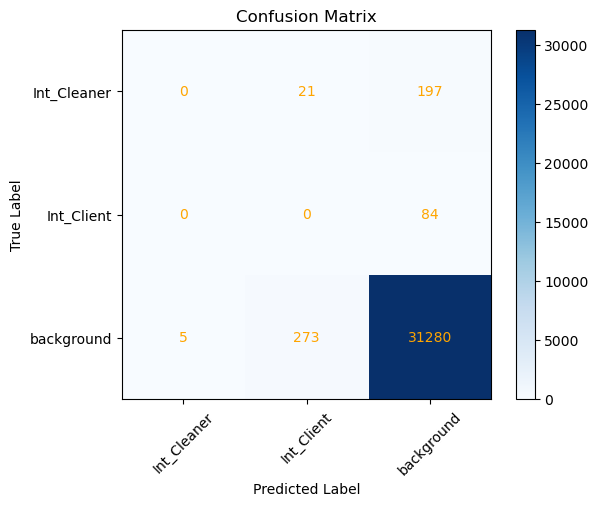

In [71]:
# Create the confusion matrix
cm = np.array(cm)

class_labels = np.sort(merged_df['Interaction'].unique())

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()